Importing the necessary libraries

In [1]:
!pip install spectral
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.measure import label, regionprops
from spectral import imshow, spy_colors
from sklearn.decomposition import PCA
from scipy.io import loadmat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Defining fractal geometry

In [2]:
def fractal_dimension(Z,threshold=0.9):
  def boxcount(Z,k):
    S=np.add.reduceat(np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0), np.arange(0, Z.shape[1], k), axis=1)
    return len(np.where((S>0) & (S<k*k))[0])

  #Thresholding the image at specified threshold
  Z=(Z>threshold)

  #Determining the maximum box size to use
  n=min(Z.shape)
  max_box_size=int(2**np.floor(np.log(n)/np.log(2)))

  #Calculating the fractal dimension using the box-counting method
  n_boxes=np.log(max_box_size)/np.log(2)
  counts=[]
  scales=[]
  for k in range(1,max_box_size//2):
    counts.append(boxcount(Z,k))
    scales.append(1/k)
  coeffs=np.polyfit(np.log(scales),np.log(counts),1)
  return -coeffs[0]

Finding the optimal no. of clusters in K-Means algorithm using elbow method

In [3]:
def plot_elbow(X):
  inertia=[]
  list_clusters=list(range(1,30))
  for k in list_clusters:
    km=KMeans(n_clusters=k)
    km.fit(X)
    inertia.append(km.inertia_)
  plt.plot(list_clusters,inertia,'bx-')
  plt.xlabel('No. of clusters')
  plt.ylabel('Inertia')
  plt.title('Elbow Curve')
  plt.show()

Loading the Indian Pines dataset and ground truth labels

In [4]:
data=loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
labels=loadmat('Indian_pines_gt.mat')['indian_pines_gt']

Displaying the image and the ground truth labels

/usr/local/lib/python3.9/dist-packages/spectral/graphics/spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)
/usr/local/lib/python3.9/dist-packages/spectral/graphics/spypylab.py:719: UserWarning: ImageView.show should only be called once.
  warnings.warn(UserWarning(msg))


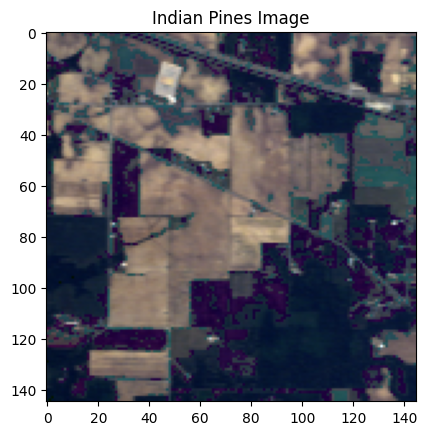

In [5]:
img=imshow(data, (29,19,9), title='Indian Pines Image')
img.show()

Data Preprocessing

In [6]:
#Reshaping the data into a 2D array (pixels x bands)
X=data.reshape(-1,data.shape[-1])
y=labels.ravel()

#Dimensionality reduction using PCA
pca=PCA(n_components=30)
X_pca=pca.fit_transform(X)

Implementing K-Means Clustering on the reduced data

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

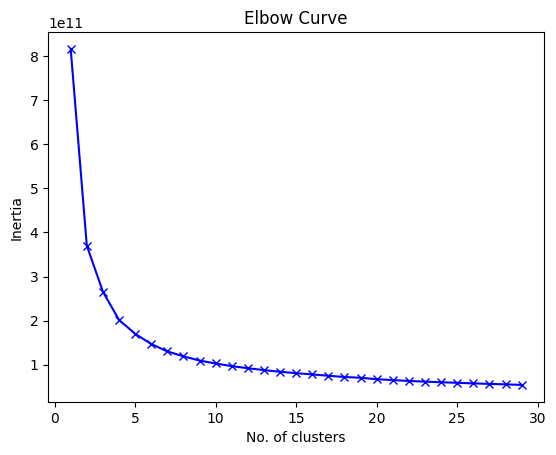

In [7]:
#Finding the optimal no. of clusters using the elbow method
plot_elbow(X_pca)

Here, the "elbow" occurs at k=4. So, the optimal number of clusters is 4.

In [8]:
#Creating, Training and applying the K-Means model to the data
model=KMeans(n_clusters=4)
model.fit(X_pca)
train_labels=model.labels_
print(train_labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 0 0 ... 1 1 1]


Fitting data back to original form

In [9]:
#Reshaping the training labels to match the original image shape
train_labels=train_labels.reshape(data.shape[:-1])

#Calculating the fractal dimension of the training labelled image
fd=fractal_dimension(train_labels)

<ipython-input-2-eeb0eb8bec3c>:20: RuntimeWarning: divide by zero encountered in log
  coeffs=np.polyfit(np.log(scales),np.log(counts),1)


Visualizing the output

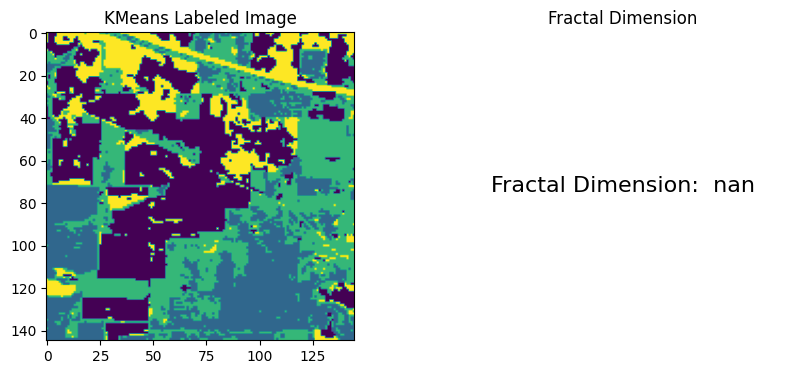

In [10]:
#Plotting the labelled image and the fractal dimensions
fig,ax=plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(train_labels, cmap='viridis')
ax[0].set_title('KMeans Labeled Image')
ax[1].text(0.5, 0.5, f"Fractal Dimension: {fd: .2f}", fontsize=16, ha='center', va='center')
ax[1].axis('off')
ax[1].set_title('Fractal Dimension')
plt.show()

Analyzing the labels

In [11]:
# Print accuracy of the clustering result
labels_true=labels.reshape(-1)
labels_pred=train_labels.reshape(-1)
acc=accuracy_score(labels_true, labels_pred)
print(f"Accuracy: {acc}")
    

Accuracy: 0.0833293697978597
